


# Vamos encher o carrinho!

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [3]:
# Importe as bibliotecas
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# leia os conjuntos de dados em DataFrames
instacart_orders = pd.read_csv('datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('datasets/products.csv', sep=';')
order_products = pd.read_csv('datasets/order_products.csv', sep=';')
aisles = pd.read_csv('datasets/aisles.csv', sep=';')
departments = pd.read_csv('datasets/departments.csv', sep=';')

In [5]:
# imprima as informações sobre o DataFrame
def df_info(df):
    print(df.head())
    print()
    print(df.info())

df_info(instacart_orders)

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nu

In [6]:
# imprima as informações sobre o DataFrame
df_info(products)

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
# imprima as informações sobre o DataFrame
df_info(order_products)
order_products.notnull().sum()

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


order_id             4545007
product_id           4545007
add_to_cart_order    4544171
reordered            4545007
dtype: int64

In [8]:
# imprima as informações sobre o DataFrame
df_info(aisles)

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [9]:
# imprima as informações sobre o DataFrame
df_info(departments)

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

Após ler os arquivos e chamar `head()` e `info()` para cada um deles com a função personalizada `df_info()`, pude perceber que os valores não são separados por vírgulas como em um `.csv` convencional, e sim separados por ponto e vírgula. Portanto, passei o argumento `;` para o parâmetro `sep=` em read_csv(), e então consegui ler corretamente todos os arquivos.

#### DataFrame `instacart_orders`:

Ao ler os dados, vi que todas as colunas, exceto a coluna `days_since_prior_order`, estavam com seus tipos corretos e sem linhas ausentes. A coluna `days_since_prior_order` deveria ter o tipo de dados `int`, já que dias são números inteiros. Além disso, ela possui valores ausentes, provavelmente relacionado ao fato de haver clientes que nunca compraram nada antes, então o número de dias desde que o cliente fez seu pedido anterior deve ser nulo.

#### DataFrame `products`:

A coluna `product_name` possui valores ausentes.

#### DataFrame `order_products`:

Me parece que todas as colunas estão corretas, exceto a coluna `add_to_cart_order`. Ela deveria ser do tipo `int`, já que representa a ordem em que os itens foram colocados no carrinho. Ela também tem valores ausentes. (precisei utilizar `.notnull().sum()` porque por algum motivo a coluna `Not-Null Count` não estava aparecendo com o método `ìnfo()`)

#### DataFrame `aisles`:

Aparentemente tudo certo com esse DataFrame.

#### DataFrame `departments`:

Tudo certo com esse DataFrame.

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

Vou começar com o DataFrame `instacart_orders`. Meu plano era transformar o a coluna `'days_since_prior_order` em int, mas o Python retorna um erro quando tento fazer isso por causa dos valores nulos presentes na coluna. Então passei para o DataFrame `order_products`, onde encontrei o mesmo problema. Acontece que na coluna `add_to_cart_order` não consegui descobrir o motivo de haver valores nulos. Talvez produtos que foram retirados do pedido?

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [10]:
# Verificar se há pedidos duplicados
print(instacart_orders[instacart_orders.duplicated()])
print()
print('Duplicated lines:', instacart_orders.duplicated().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

Há linhas duplicadas? Se sim, o que elas têm em comum?

Há 15 linhas duplicadas. Aparentemente, todas as linhas duplicadas são de pedidos feitos na quarta-feira às 2 da manhã.

In [11]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

print(instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

O que esse resultado quer dizer?

Quer dizer que na verdade há apenas 106 pedidos feitos na quarta-feira.

In [12]:
# Remova pedidos duplicados
instacart_orders.drop_duplicates(inplace=True)

In [13]:
# Verifique as linhas duplicadas mais uma vez
print('Duplicated lines:', instacart_orders.duplicated().sum())

Duplicated lines: 0


In [14]:
# Verifique novamente apenas os IDs de pedidos duplicados
print(instacart_orders['order_id'].value_counts())

order_id
2071924    1
1515936    1
1690866    1
1454967    1
1768857    1
          ..
2276302    1
102585     1
1162566    1
446014     1
2266494    1
Name: count, Length: 478952, dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

Verifiquei se haviam linhas totalmente duplicadas com o método `duplicated()` e descobri que haviam 15 linhas duplicadas. Removi as linhas com `drop_duplicates(inplace=True)` e verifiquei novamente se haviam duplicatas. Quando vi que não haviam mais linhas duplicadas, verifiquei os IDs com `value_counts()` e vi que eram todos unívocos, confirmando que não haviam mais pedidos duplicados.

### DataFrame `products`

In [15]:
# Verifique se há linhas completamente duplicadas
print('Duplicated lines:', products.duplicated().sum())

Duplicated lines: 0


In [16]:
# Verifique apenas IDs dos produtos duplicados
print(products['product_id'].value_counts())

product_id
49694    1
1        1
2        1
3        1
4        1
        ..
19       1
18       1
17       1
16       1
15       1
Name: count, Length: 49694, dtype: int64


In [17]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
print(products['product_name'].str.lower().value_counts())

product_name
green tea with ginseng and honey               3
hearts of palm                                 2
diced peeled tomatoes in tomato juice          2
flat fillets of anchovies in pure olive oil    2
edamame soybeans in pods                       2
                                              ..
vodka- triple distilled- twist of vanilla      1
en croute roast hazelnut cranberry             1
artisan baguette                               1
smartblend healthy metabolism dry cat food     1
dry nose oil                                   1
Name: count, Length: 48332, dtype: int64


In [18]:
# Verifique os nomes de produtos duplicados que não estão faltando
product_counts = products['product_name'].str.lower().value_counts()
duplicated_values = product_counts[product_counts > 1].index
print(duplicated_values)

Index(['green tea with ginseng and honey', 'hearts of palm',
       'diced peeled tomatoes in tomato juice',
       'flat fillets of anchovies in pure olive oil',
       'edamame soybeans in pods', 'mozzarella sticks with marinara sauce',
       'chicken in a biskit baked snack crackers',
       'solid white albacore tuna in spring water',
       'solid white albacore tuna in water', 'bag of oranges',
       ...
       'glass cleaner with ammonia', 'vitamin d3 1000 iu',
       'spring water body wash', 'chunk light tuna in water',
       'megaflora probiotic', 'spreadable butter with canola oil',
       'burrito- steak & cheese', 'cookies 'n cream ice cream',
       'pineapple slices in 100% pineapple juice', 'vitamin d3 5000 iu'],
      dtype='object', name='product_name', length=103)


Descreva brevemente suas conclusões e o que você fez com elas.

Verifiquei se haviam linhas totalmente duplicadas, e não havia nenhuma. Então investiguei os IDs de produtos duplicados, e não havia nenhum duplicado. Quando investiguei a coluna `product_name`, vi que haviam 103 produtos duplicados.

### DataFrame `departments`

In [19]:
# Verifique se há linhas completamente duplicadas
print('Duplicated lines:', departments.duplicated().sum())

Duplicated lines: 0


In [20]:
# Verifique apenas se há IDs dos produtos duplicados
print(departments['department_id'].value_counts())

department_id
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
Name: count, dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

Nesse DataFrame não há valores duplicados, então deixei tudo como estava.

### DataFrame `aisles`

In [21]:
# Verifique se há linhas completamente duplicadas
print('Duplicated lines:', aisles.duplicated().sum())

Duplicated lines: 0


In [22]:
# Verifique apenas se há IDs dos produtos duplicados
print(aisles['aisle_id'].value_counts())

aisle_id
1      1
2      1
3      1
4      1
5      1
      ..
130    1
131    1
132    1
133    1
134    1
Name: count, Length: 134, dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

Nesse DataFrame não há valores duplicados, então deixei tudo como estava.

### DataFrame `order_products`

In [23]:
# Verifique se há linhas completamente duplicadas
print('Duplicated lines:', aisles.duplicated().sum())

Duplicated lines: 0


In [24]:
# Verifique mais uma vez se há outros casos complicados de duplicados
print(order_products['order_id'].value_counts())

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
1933026      1
2528686      1
2273859      1
3369939      1
818830       1
Name: count, Length: 450046, dtype: int64


In [25]:
print(order_products[order_products['order_id'] == 171934].sample(20))

         order_id  product_id  add_to_cart_order  reordered
2503879    171934       21872                6.0          1
3462154    171934       47232                NaN          0
2729727    171934        4350                NaN          0
613154     171934       44422                NaN          0
2264485    171934       12591               28.0          0
4396014    171934       12955               18.0          0
3487549    171934       48957               46.0          1
1864945    171934       10339               10.0          0
3535       171934       36397                7.0          0
464703     171934        5652                NaN          0
4168333    171934       48407               26.0          0
927294     171934       45309               52.0          1
2472853    171934       47719               30.0          0
289342     171934        3081               20.0          0
2554180    171934       34249               39.0          1
2729013    171934       25886           

Descreva brevemente suas conclusões e o que você fez com elas.

Há muitos IDs duplicados. Imagino que sejam do mesmo pedido e que na verdade sejam pedidos com muitos produtos.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [26]:
# Encontre valores ausentes na coluna 'product_name'
print(products[products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões.

Há 1258 valores ausentes na coluna `'product_name'`

In [27]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?
print(products[products['product_name'].isna()]['aisle_id'].unique())

[100]


Descreva brevemente suas conclusões.

Sim, após analisar com o método `unique()` pude concluir que o corredor de ID 100 está presente em todos os duplicados.

In [28]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
print(products[products['product_name'].isna()]['department_id'].unique())

[21]


Descreva brevemente suas conclusões.

Da mesma forma que fiz anteriormente, pude concluir que sim, todos os valores ausentes estão relacionados com o departamento de ID 21.

In [29]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
print(departments[departments['department_id'] == 21])
print()
print(aisles[aisles['aisle_id'] == 100])

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


Descreva brevemente suas conclusões.

Faz todo sentido os valores estarem ausentes com essas condições, já que a ID 21 de `department_id` e a ID 100 de `aisle_id` representam departamentos e corredores inexistentes.

In [30]:
# Preencha nomes de produtos ausentes com 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

Descreva brevemente suas conclusões e o que você fez com elas.

A coluna `product_name` possuía 1258 valores ausentes. A princípio não entendi, mas ao analisar minuciosamente percebi que todos os valores NaN estavam associados às IDs 21, de `'department_id'` e 100, de `'aisle_id'`, que são representadas pelo valor `'missing'`. Ao entender que os produtos realmente não existem, substituí os valores NaN por `'Unknown'`.

### DataFrame `orders`

In [31]:
# Encontre os valores ausentes
print(instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [32]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
print(instacart_orders[instacart_orders['days_since_prior_order'].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

Descreva brevemente suas conclusões e o que você fez com elas.

Os valores ausentes se devem ao motivo de haverem clientes que nunca fizeram pedidos, então imagino que seja melhor deixar como NaN.

### DataFrame `order_products`

In [33]:
# Encontre os valores ausentes
print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [34]:
# Quais são os valores mínimo e máximo dessa coluna?
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


Descreva brevemente suas conclusões.

Há 836 valores ausentes na coluna `'add_to_cart_order'`. O mínimo e máximo da coluna nos revela que o maior pedido foi feito com 64 itens adicionados.

In [35]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
missing_order = order_products[order_products['add_to_cart_order'].isna()]
print(missing_order)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [36]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
print(missing_order.groupby('order_id').count().min())

product_id           1
add_to_cart_order    0
reordered            1
dtype: int64


Descreva brevemente suas conclusões.

Não entendi muito bem essa parte, nem todos os pedidos com valores ausentes possuem mais de 64 produtos.

In [37]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')
order_products.info()
order_products.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


C:\Users\joaod\AppData\Local\Temp\ipykernel_5024\2110251531.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_products['add_to_cart_order'].fillna(999, inplace=True)


order_id             4545007
product_id           4545007
add_to_cart_order    4545007
reordered            4545007
dtype: int64

Descreva brevemente suas conclusões e o que você fez com elas.

Vi que haviam valores ausentes na coluna `'add_to_cart_order'`. Fiz uma análise pra descobrir se os valores ausentes eram causados por um suposto sobrecarregamento do carrinho (mais de 64 produtos) mas essa hipótese foi derrubada. Depois, substituí os valores NaN por `999`.

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

Nessa etapa tive algumas dificuldades pra tratar os DataFrames, afinal cada um tinha seu desafio. O mais complicado foi o DataFrame `order_products`.

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [38]:
print(instacart_orders['order_hour_of_day'].min())
print(instacart_orders['order_hour_of_day'].max())

0
23


In [39]:
print(instacart_orders['order_dow'].min())
print(instacart_orders['order_dow'].max())

0
6


Escreva suas conclusões aqui

Os dados nas colunas parecem fazer sentido.

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

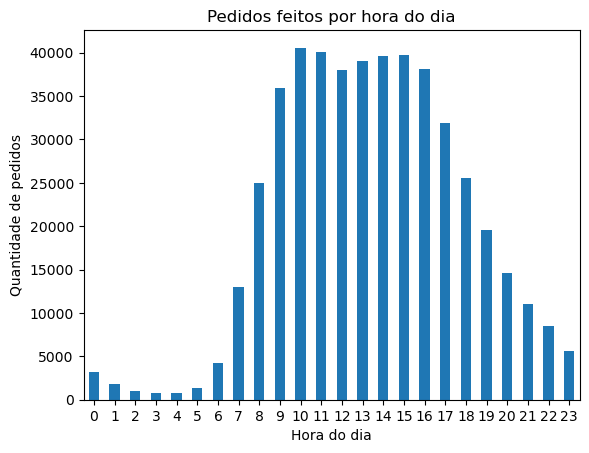

In [40]:
orders_by_hour = instacart_orders['order_hour_of_day'].value_counts().sort_index()
orders_by_hour_df = orders_by_hour.reset_index()
orders_by_hour_df.columns = ['hours', 'order_hour_of_day']
orders_by_hour_df.plot(
    kind='bar',
    title='Pedidos feitos por hora do dia',
    x='hours',
    y='order_hour_of_day',
    xlabel='Hora do dia',
    ylabel='Quantidade de pedidos',
    rot=0,
    legend=False
)
plt.show()

Escreva suas conclusões aqui

Podemos visualizar que 10h é o horário em que mais fazem pedidos, enquanto 4h é o horário em que menos fazem pedidos.

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

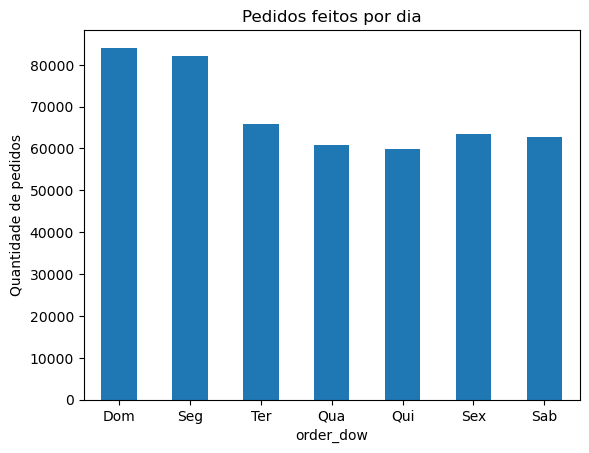

In [41]:
orders_by_day = instacart_orders['order_dow'].value_counts().sort_index().plot(
    kind='bar',
    title='Pedidos feitos por dia',
    ylabel='Quantidade de pedidos',
    rot=0,
    legend=False
)
plt.xticks(range(7), ['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab'])
plt.show()

Escreva suas conclusões aqui

Pelo visto, domingo é o dia em que mais fazem pedidos, seguido por sábado.

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

Pelo visto, a maior parte das pessoas faz suas novas compras pelo menos 30 dias depois da compra anterior.

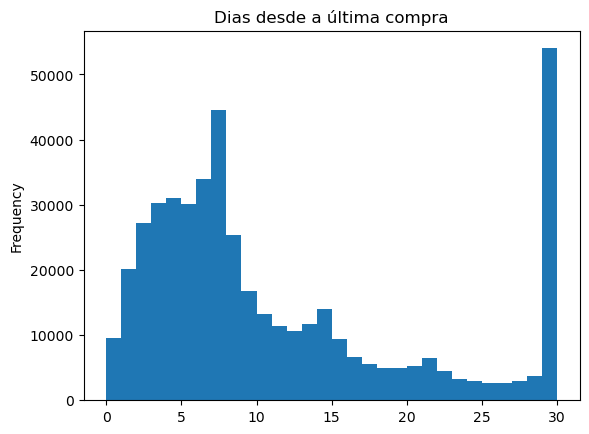

In [42]:
instacart_orders['days_since_prior_order'].plot(
    kind='hist',
    title='Dias desde a última compra',
    bins=30
)
plt.show()

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [43]:
df_wednesday = instacart_orders[instacart_orders['order_dow'] == 3].groupby('order_hour_of_day')['user_id'].nunique()
df_saturday = instacart_orders[instacart_orders['order_dow'] == 6].groupby('order_hour_of_day')['user_id'].nunique()

In [44]:
df_wed_sat = pd.concat([df_wednesday, df_saturday], axis='columns')
df_wed_sat.columns = ['wednesday', 'saturday']

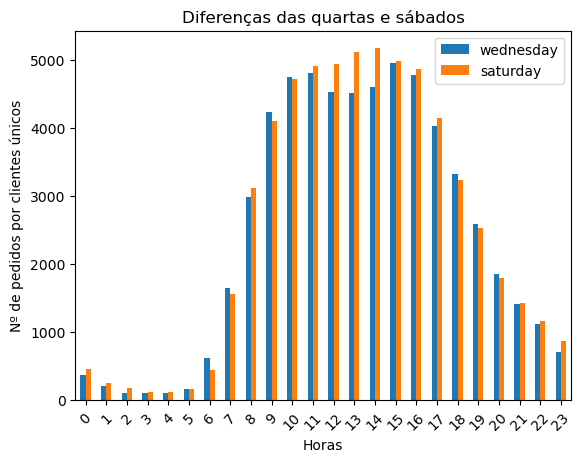

In [45]:
df_wed_sat.plot(
    kind='bar',
    title='Diferenças das quartas e sábados',
    xlabel='Horas',
    ylabel='Nº de pedidos por clientes únicos',
    rot=45
)
plt.show()

Escreva suas conclusões aqui

Há poucos pedidos durante a madrugada, mas os sábados ficam ligeiramente a frente. Durante a manhã há um grande crescimento do nº de pedidos, e a quarta-feira fica na frente nesse horário. O pico de pedidos se dá do período das 09h até as 16h, sendo que o sábado leva vantagem com muitos pedidos no horário do almoço. No final da tarde pra de noite vemos um declínio no nº de pedidos.

### [B2] Qual é a distribuição do número de pedidos por cliente?

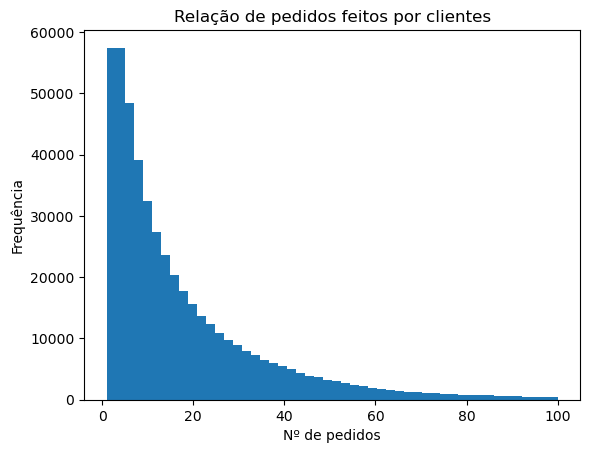

In [46]:
instacart_orders['order_number'].plot(
    kind='hist',
    title='Relação de pedidos feitos por clientes',
    bins=50
)
plt.xlabel('Nº de pedidos')
plt.ylabel('Frequência')
plt.show()

Escreva suas conclusões aqui

Vemos uma queda constante no nº de pedidos feitos por clientes, sendo que a grande maioria fez até 20 pedidos.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [47]:
top_products_ids = order_products['product_id'].value_counts().head(20).reset_index()
top_products_ids.columns = ['product_id', 'count']
print(top_products_ids)

    product_id  count
0        24852  66050
1        13176  53297
2        21137  37039
3        21903  33971
4        47209  29773
5        47766  24689
6        47626  21495
7        16797  20018
8        26209  19690
9        27845  19600
10       27966  19197
11       22935  15898
12       24964  15292
13       45007  14584
14       39275  13879
15       49683  13675
16       28204  12544
17        5876  12232
18        8277  11993
19       40706  11781


In [48]:
top_products = top_products_ids.merge(products, on='product_id')
top_products = top_products.drop(['aisle_id', 'department_id'], axis=1)
top_products = top_products[['count', 'product_id', 'product_name']]
top_products

,count,product_id,product_name
0,66050,24852,Banana
1,53297,13176,Bag of Organic Bananas
2,37039,21137,Organic Strawberries
3,33971,21903,Organic Baby Spinach
4,29773,47209,Organic Hass Avocado
5,24689,47766,Organic Avocado
6,21495,47626,Large Lemon
7,20018,16797,Strawberries
8,19690,26209,Limes
9,19600,27845,Organic Whole Milk


Escreva suas conclusões aqui

Bananas lideram como o produto mais pedido pelos clientes, sendo que bananas tradicionais é o mais pedido e bananas orgânicas são o segundo mais pedido. Podemos perceber que os clientes pedem muitas frutas e leguminosas pela plataforma, afinal 19 dos 20 produtos entram nessa categoria.

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [49]:
items_by_order = order_products.groupby('order_id')['product_id'].count()
print(items_by_order.describe())

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


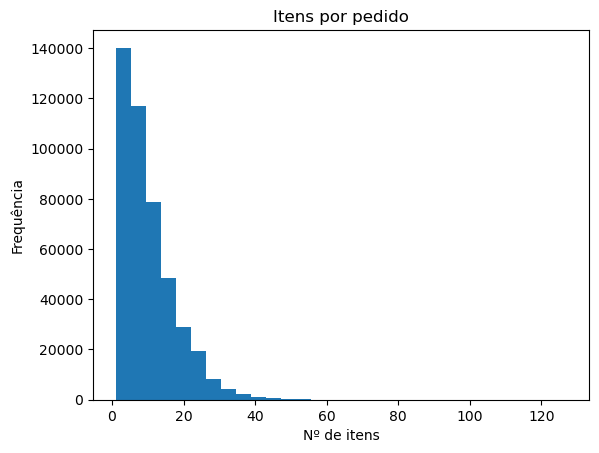

In [50]:
items_by_order.plot(
    kind='hist',
    title='Itens por pedido',
    bins=30,
    
)
plt.xlabel('Nº de itens')
plt.ylabel('Frequência')
plt.show()

Escreva suas conclusões aqui

A maior parte das pessoas compra de 0 a 20 itens. A parcela que compra de 20 a 40 é bem pequena, e a parcela de quem compra mais do que isso é ínfima.

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [51]:
reordered = order_products[order_products['reordered'] == 1]
top_reordered = reordered['product_id'].value_counts().head(20).reset_index()
top_reordered.columns = ['product_id', 'count']

In [52]:
top_reordered = top_reordered.merge(products, on='product_id')

In [53]:
top_reordered = top_reordered.drop(['aisle_id', 'department_id'], axis=1)

In [54]:
top_reordered

,product_id,count,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


Escreva suas conclusões aqui

Podemos ver que bananas lideram novamente, seja sua versão tradicional ou sua versão orgânica. Novamente vemos que 19 dos 20 produtos são frutas e leguminosas. Há uma diferença na ordem dos produtos mas a lista está praticamente igual.

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [55]:
product_total = order_products.groupby('product_id').size()
product_total

product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Length: 45573, dtype: int64

In [56]:
reorder_by_product = order_products.groupby('product_id')['reordered'].sum()
reorder_by_product

product_id
1        158
2          0
3         31
4         25
7          1
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Name: reordered, Length: 45573, dtype: int64

In [57]:
reorder_proportion = (reorder_by_product / product_total).reset_index()
reorder_proportion.columns = ['product_id', 'reorder_rate']

In [58]:
reorder_proportion = reorder_proportion.merge(products, on='product_id')

In [59]:
reorder_proportion = reorder_proportion.drop(['aisle_id', 'department_id'], axis=1)

In [60]:
reorder_proportion

,product_id,reorder_rate,product_name
0,1,0.564286,Chocolate Sandwich Cookies
1,2,0.000000,All-Seasons Salt
2,3,0.738095,Robust Golden Unsweetened Oolong Tea
3,4,0.510204,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,7,0.500000,Pure Coconut Water With Orange
...,...,...,...
45568,49690,0.800000,HIGH PERFORMANCE ENERGY DRINK
45569,49691,0.430556,ORIGINAL PANCAKE & WAFFLE MIX
45570,49692,0.416667,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
45571,49693,0.440000,SPRING WATER BODY WASH


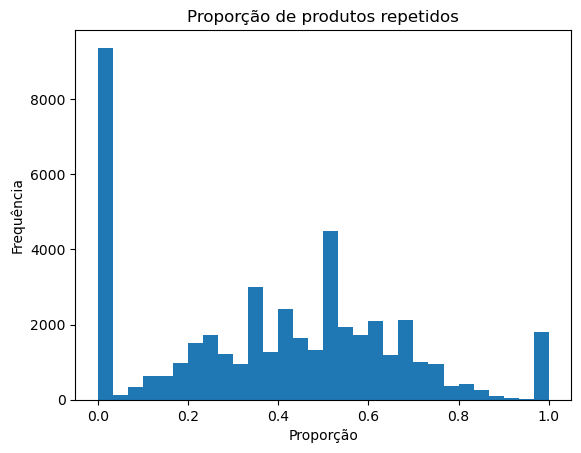

In [61]:
reorder_proportion['reorder_rate'].plot(
    kind='hist',
    title='Proporção de produtos repetidos',
    bins=30
)
plt.xlabel('Proporção')
plt.ylabel('Frequência')
plt.show()

Escreva suas conclusões aqui

Aparentemente a maior parte (mais de 8 mil) dos produtos não se repetem por pedido, ou seja, as pessoas apenas compram um de cada desses produtos. Podemos ver que uma boa parcela (aproximadamente 5 mil) dos produtos ficam ali na marca do 0.5 de proporção, o que significa que se repetem em metade dos pedidos. Também podemos ver que há produtos que quase sempre se repetem (aproximadamente 2 mil).

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [62]:
user_order = instacart_orders[['order_id', 'user_id']]

In [63]:
order_products_users = order_products.merge(user_order, on='order_id')
order_products_users

,order_id,product_id,add_to_cart_order,reordered,user_id
0,2141543,11440,17,0,58454
1,567889,1560,1,1,129474
2,2261212,26683,1,1,47476
3,491251,8670,35,1,134505
4,2571142,1940,5,1,155995
...,...,...,...,...,...
4545002,577211,15290,12,1,76414
4545003,1219554,21914,9,0,163902
4545004,692640,47766,4,1,597
4545005,319435,691,8,1,7124


In [64]:
products_by_user = order_products_users.groupby('user_id').size()
products_by_user

user_id
2          26
4           2
5          12
6           4
7          14
         ... 
206203     27
206206     21
206207     46
206208    125
206209     25
Length: 149626, dtype: int64

In [65]:
reordered_by_user = order_products_users.groupby('user_id')['reordered'].sum()
reordered_by_user

user_id
2          1
4          0
5          8
6          0
7         13
          ..
206203     6
206206    15
206207    41
206208    87
206209     8
Name: reordered, Length: 149626, dtype: int64

In [66]:
reordered_by_user_proportion = (reordered_by_user / products_by_user).reset_index()
reordered_by_user_proportion.columns = ['user_id', 'reorder_rate']
reordered_by_user_proportion

,user_id,reorder_rate
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571
...,...,...
149621,206203,0.222222
149622,206206,0.714286
149623,206207,0.891304
149624,206208,0.696000


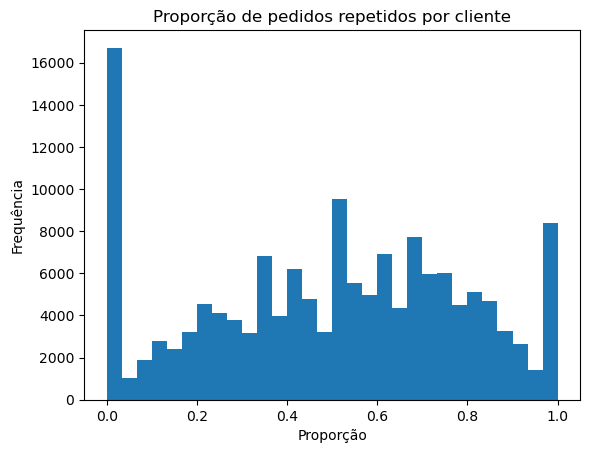

In [67]:
reordered_by_user_proportion['reorder_rate'].plot(
    kind='hist',
    title='Proporção de pedidos repetidos por cliente',
    bins=30
)
plt.xlabel('Proporção')
plt.ylabel('Frequência')
plt.show()

Escreva suas conclusões aqui

A parcela dos clientes que não repete seus pedidos (mais de 16 mil) é similar à parcela que repete, pois podemos ver nno histograma que aproximadamente 10 mil clientes repete seus pedidos pelo menos metade das vezes, e 8 mil clientes sempre repetem os pedidos. 

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [68]:
first_added_products = order_products[order_products['add_to_cart_order'] == 1]

In [69]:
top_first_products =  first_added_products['product_id'].value_counts().head(20).reset_index()
top_first_products.columns = ['product_id', 'count']

In [70]:
top_first_products = top_first_products.merge(products, on='product_id')
top_first_products = top_first_products.drop(['aisle_id', 'department_id'], axis=1)

In [71]:
top_first_products

,product_id,count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


Escreva suas conclusões aqui

Novamente as bananas lideram o ranking, mas dessa vez alguns leites invadem o ranking.

# Conclusão geral do projeto:

O projeto foi bem difícil. A primeira etapa foi tranquila, a segunda etapa tiveram alguns momentos mais complicados mas no mais foi tranquila também. Já a terceira etapa foi muito difícil, achei que o sprint não me preparou bem nessa parte de relacionar os dados para obter certos resultados. Consegui completar o projeto com ajuda de muita pesquisa e tempo.